In [1]:
#import the required libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#pip install tensorflow

  Stored in directory: C:\Users\dravi\AppData\Local\pip\Cache\wheels\7c\06\54\bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built termcolor
  Found existing installation: zipp 0.3.3
    Uninstalling zipp-0.3.3:
      Successfully uninstalled zipp-0.3.3
  Found existing installation: importlib-metadata 0.0.0
    Uninstalling importlib-metadata-0.0.0:
      Successfully uninstalled importlib-metadata-0.0.0
  Found existing installation: urllib3 1.26.7
    Uninstalling urllib3-1.26.7:
      Successfully uninstalled urllib3-1.26.7
Note: you may need to restart the kernel to use updated packages.


selenium 4.0.0 has requirement urllib3[secure]~=1.26, but you'll have urllib3 1.24.3 which is incompatible.
tensorboard 2.8.0 has requirement setuptools>=41.0.0, but you'll have setuptools 40.8.0 which is incompatible.


# Importing Data into Tensorflow Dataset

Use image_dataset_from_directory to load images into Tensorflow dataset

In [2]:
dataset=tf.keras.preprocessing.image_dataset_from_directory('Images',shuffle=True,image_size=(320,320),batch_size=32)

Found 720 files belonging to 3 classes.


In [3]:
classnames=dataset.class_names
classnames

['Jeans', 'Saree', 'Trousers']

In [4]:
len(dataset)

23

Visualise some of the images with their labels

C:\Users\dravi\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


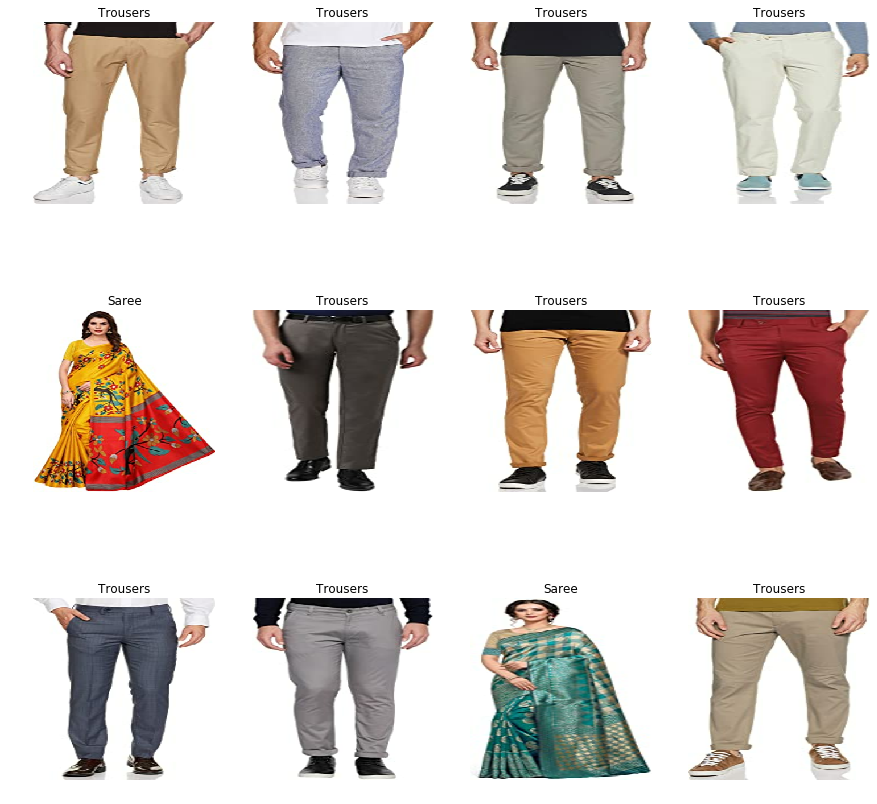

In [5]:
plt.figure(figsize=(15,15))
for image_batch,label_batch in dataset.take(30):
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(classnames[label_batch[i]])
        plt.axis("off")

In [6]:
len(dataset)

23

# Splitting the data

Define a function to split the dataset into training,validation and testing data

In [7]:
def dataset_split(ds,train_split,val_split,test_split,shuffle,shuffle_size):
    ds_size=len(ds)
    
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
        
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    
    train_data=ds.take(train_size)
    
    val_data=ds.skip(train_size).take(val_size)
    test_data=ds.skip(train_size).skip(val_size)
    
    return train_data,val_data,test_data

80% of the data is taken as training data.Of the remaining 20%, 10% is taken as validation data and 10% as testing.

In [8]:
train_data,val_data,test_data=dataset_split(dataset,0.8,0.1,0.1,True,100)

In [9]:
len(train_data)

18

In [10]:
len(test_data)

3

In [11]:
len(val_data)

2

# Model Building

Create layers for resizing, normalizing and augmentation of the data

In [12]:
resize_and_rescale=tf.keras.Sequential([layers.experimental.preprocessing.Resizing(320,320),layers.experimental.preprocessing.Rescaling(1.0/255)])

In [13]:
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2)])

Convulutional Neural Networks(CNN) is used for modelling. Softmax activation is used in the output layer.

In [25]:
inputshape=(32,320,320,3)
model=tf.keras.Sequential([
                        resize_and_rescale,
                        layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=inputshape),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
                        layers.Conv2D(64, (3, 3), activation='relu'),
                        layers.MaxPooling2D((2, 2)),
                         
                        layers.Flatten(),
                        layers.Dense(64,activation='relu'),
                        layers.Dense(3,activation='softmax')
                         ])

model.build(input_shape=inputshape)

In [26]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 320, 320, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 318, 318, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 159, 159, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (32, 157, 157, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (32, 78, 78, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (32, 76, 76, 64)         

Adam optimizer, SparseCategoricalCrossentropy for losses and accuracy as metric are used.

In [27]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Model is fitted and run with 20 epochs

In [28]:
history=model.fit(train_data,epochs=20,batch_size=32,verbose=1,validation_data=val_data)

Epoch 1/20
18/18 [==============================] - 56s 3s/step - loss: 1.0364 - accuracy: 0.4821 - val_loss: 0.5186 - val_accuracy: 0.8438
Epoch 2/20
18/18 [==============================] - 63s 3s/step - loss: 0.4944 - accuracy: 0.7571 - val_loss: 0.3231 - val_accuracy: 0.8594
Epoch 3/20
18/18 [==============================] - 65s 4s/step - loss: 0.3261 - accuracy: 0.8663 - val_loss: 0.3051 - val_accuracy: 0.8958
Epoch 4/20
18/18 [==============================] - 65s 4s/step - loss: 0.3094 - accuracy: 0.8768 - val_loss: 0.1641 - val_accuracy: 0.9375
Epoch 5/20
18/18 [==============================] - 63s 3s/step - loss: 0.2788 - accuracy: 0.8839 - val_loss: 0.2102 - val_accuracy: 0.9375
Epoch 6/20
18/18 [==============================] - 63s 3s/step - loss: 0.2417 - accuracy: 0.8964 - val_loss: 0.2515 - val_accuracy: 0.9062
Epoch 7/20
18/18 [==============================] - 62s 3s/step - loss: 0.2455 - accuracy: 0.9000 - val_loss: 0.1761 - val_accuracy: 0.9219
Epoch 8/20
18/18 [==

In [53]:
history.history['val_accuracy']

[0.84375,
 0.859375,
 0.8958333134651184,
 0.9375,
 0.9375,
 0.90625,
 0.921875,
 0.953125,
 1.0,
 1.0,
 0.9791666865348816,
 0.96875,
 1.0,
 0.984375,
 1.0,
 1.0,
 0.9375,
 0.984375,
 1.0,
 1.0]

In [29]:
model.evaluate(test_data)

3/3 [==============================] - 3s 614ms/step - loss: 0.0065 - accuracy: 1.0000


[0.00646078959107399, 1.0]

It can be seen that 100% accuracy for validation and test data is obtained.

Define a function to show images of test data and the model predictions and run it

In [38]:
import numpy as np
def predict(model,img):
    image_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    image_array=tf.expand_dims(image_array,0)
    prediction=model.predict(image_array)
    predicted_class=classnames[np.argmax(prediction[0])]
    return predicted_class

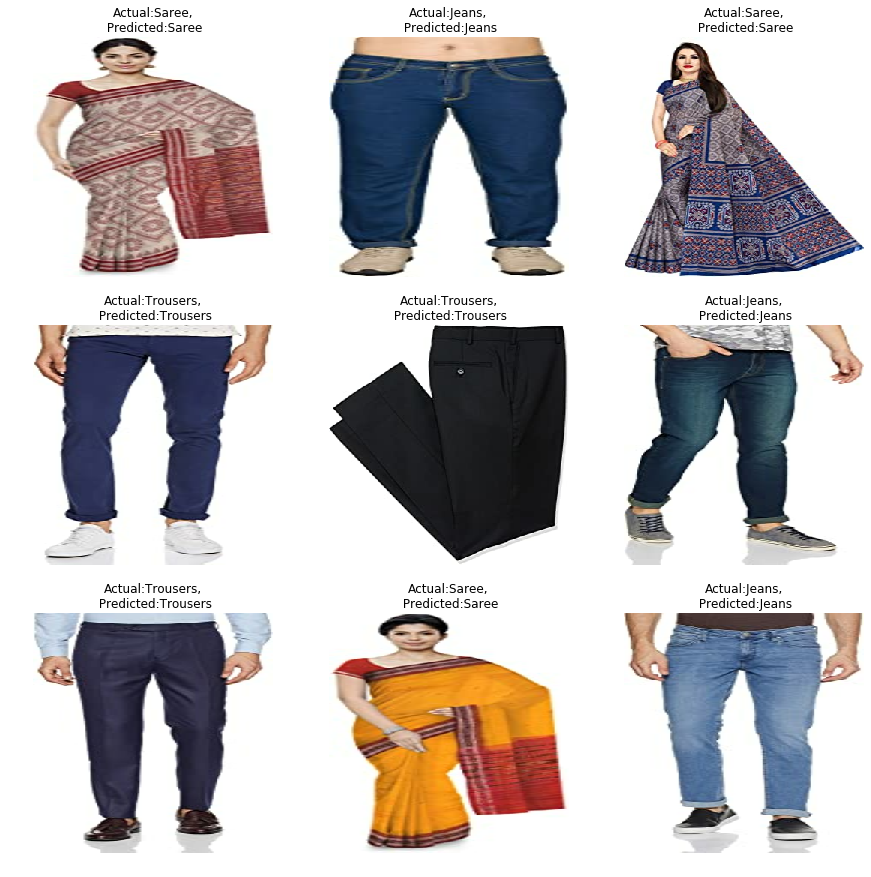

In [40]:
plt.figure(figsize=(15,15))
for images,labels in test_data.take(10):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        
        predicted_class=predict(model,images[i].numpy())
        actual_class=classnames[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{predicted_class}")
        plt.axis("off")

From the above it can be seen that the predicted and actual labels match in all the images.

# Saving the Model

In [47]:
model.save('model1')

INFO:tensorflow:Assets written to: model1\assets


In [50]:
newmodel=tf.keras.models.load_model('model1')

In [51]:
newmodel.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 320, 320, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 318, 318, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 159, 159, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 157, 157, 64)      18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 78, 78, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 76, 76, 64)       